In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# all_images = np.loadtxt('mnist//fashion-mnist_train.csv',delimiter=',', skiprows=1)[:,1:]
X = np.loadtxt('solutions_train.txt',delimiter=',')[:,0:]
print(X.shape[0])
print(type(X))

10001
<class 'numpy.ndarray'>


In [3]:
n_nodes_inpl = 9  #encoder
n_nodes_hl1  = 3  #encoder

n_nodes_hl2  = 3  #decoder
n_nodes_outl = 9  #decoder

In [4]:
hidden_1_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_inpl,n_nodes_hl1])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))  }

hidden_2_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))  }

output_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_outl])),               
'biases':tf.Variable(tf.random_normal([n_nodes_outl])) }

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
input_layer = tf.placeholder('float', [None, 9])

layer_1 = tf.nn.sigmoid(
       tf.add(tf.matmul(input_layer,hidden_1_layer_vals['weights']),
       hidden_1_layer_vals['biases']))


layer_2 = tf.nn.sigmoid(
       tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),
       hidden_2_layer_vals['biases']))


output_layer = tf.matmul(layer_2,output_layer_vals['weights']) +\
               output_layer_vals['biases']

output_true = tf.placeholder('float', [None, 9])

meansq = tf.reduce_mean(tf.square(output_layer - output_true))

learn_rate = 0.1   
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [6]:
%%time
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100  # how many images to use together for training
hm_epochs =1000    # how many times to go through the entire dataset
tot_solutions = X.shape[0] # total number of images

for epoch in range(hm_epochs):

    epoch_loss = 0   
    for i in range(int(tot_solutions/batch_size)):

        epoch_x = X[ i*batch_size : (i+1)*batch_size ]

        _, c = sess.run([optimizer, meansq],\
               feed_dict={input_layer: epoch_x, \
               output_true: epoch_x})
        
        epoch_loss += c
    if epoch % 100 == 0:
        print('Epoch', epoch)
print('Epoch', epoch, '/', hm_epochs, 'loss:',epoch_loss)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
Epoch 999 / 1000 loss: 289913985280.0
CPU times: user 2min 6s, sys: 14.4 s, total: 2min 20s
Wall time: 1min 19s


In [8]:
tvars = tf.trainable_variables()
tvars_vals = sess.run(tvars)
w = -1
for var, val in zip(tvars, tvars_vals):
    if var.name == 'Variable:0':
        print(var.name, val)
        w = val

Variable:0 [[ 0.3125084   0.46642122 -1.45117283]
 [ 0.76783597  0.991157   -0.93339264]
 [ 0.78313982 -0.58231032  1.61568022]
 [ 1.3054775   0.54344583 -0.74948335]
 [-1.11135304 -1.31260765  1.09232652]
 [ 0.83199799 -1.05282295 -1.38777435]
 [-1.12596834  1.41664696  0.97395939]
 [-0.39072263  0.43042383 -2.58190179]
 [ 0.41617087 -1.29118836 -0.50053972]]


In [7]:
hidden_1_layer_vals['weights']

<tf.Variable 'Variable:0' shape=(9, 3) dtype=float32_ref>

In [14]:
w_df = pd.DataFrame(data = w, columns = 'w1 w2'.split())
W = w_df.values

In [15]:
df = pd.DataFrame(data = W.T.dot(X.T))

In [16]:
X[0].T

array([  1.55755000e+05,   1.90000000e+02,   1.78000000e+02,
         3.00000000e+00,   7.00000000e+00,   1.03200000e+03,
         1.44000000e+02,   1.20800000e+03,   7.66233766e-01])

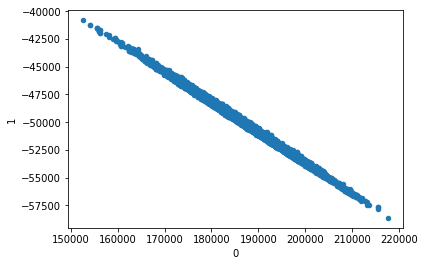

In [17]:
df.T.plot(kind='scatter', x=0,y=1)